(640, 480)
[[1.91516960e-174 1.01397727e-173 5.33114706e-173 ... 5.33114706e-173
  1.01397727e-173 1.91516960e-174]
 [6.68457825e-174 3.53911760e-173 1.86074746e-172 ... 1.86074746e-172
  3.53911760e-173 6.68457825e-174]
 [2.32401543e-173 1.23043872e-172 6.46922761e-172 ... 6.46922761e-172
  1.23043872e-172 2.32401543e-173]
 ...
 [1.85235247e-108 9.80719046e-108 5.15628663e-107 ... 5.15628663e-107
  9.80719046e-108 1.85235247e-108]
 [9.96362703e-109 5.27519410e-108 2.77351734e-107 ... 2.77351734e-107
  5.27519410e-108 9.96362703e-109]
 [5.33838043e-109 2.82637968e-108 1.48601415e-107 ... 1.48601415e-107
  2.82637968e-108 5.33838043e-109]]


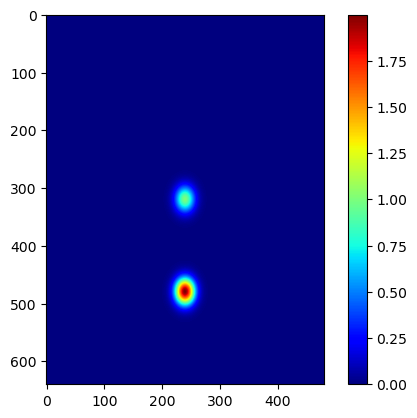

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, y, F, x0, y0, sigma_x=0.05, sigma_y=0.05):
    return F * np.exp(-(np.square(x - x0)/(2*np.square(sigma_x))) - (np.square(y - y0)/(2*np.square(sigma_y))))

# Example usage
X, Y = np.meshgrid(np.linspace(-1, 1, 480), np.linspace(-1, 1, 640))
Z1 = gaussian(X, Y, F=1.0, x0=0, y0=0.0)
Z2 = gaussian(X, Y, F=2.0, x0=0, y0=0.5)

Z = Z1+Z2
print(Z.shape)
print(Z)
plt.imshow(Z, cmap='jet')
plt.colorbar()
plt.show()

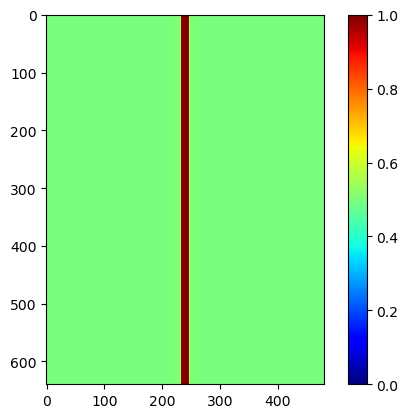

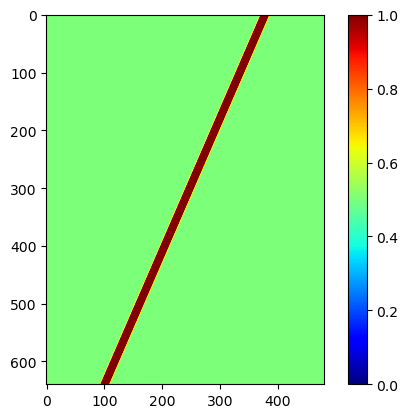

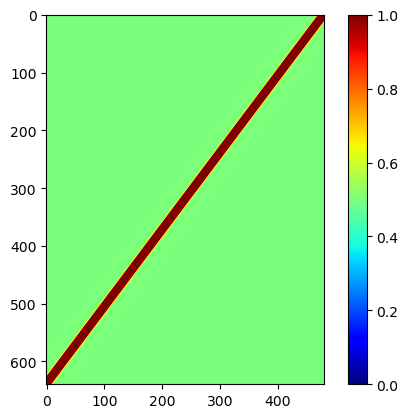

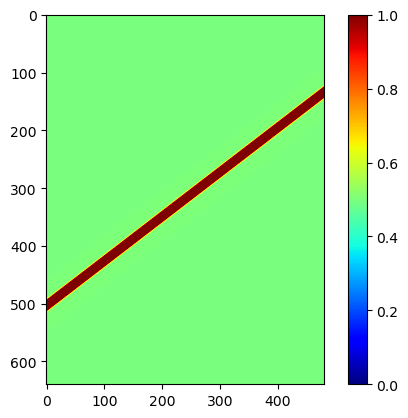

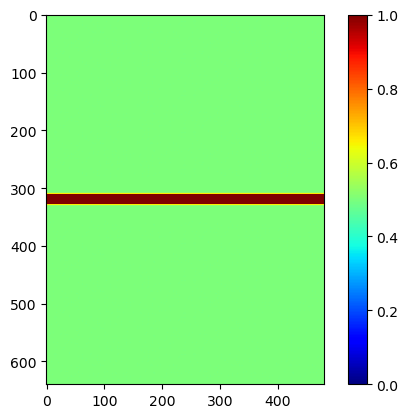

In [26]:
def simulate_edge(x, y, w, theta):
    x1 = np.cos(theta) * x + np.sin(theta) * y
    y1 = -np.sin(theta) * x + np.cos(theta) * y

    indent = 0.5 * (1 + np.tanh((x1 + w/2) / (w/10)) - np.tanh((x1 - w/2) / (w/10)))

    return indent

# Example usage
X, Y = np.meshgrid(np.linspace(-1, 1, 480), np.linspace(-1, 1, 640))
Z = simulate_edge(X, Y, w=0.05, theta=np.deg2rad(45))


for i in [0,30,45,60,90]:
    Z = simulate_edge(X, Y, w=0.05, theta=np.deg2rad(i))
    plt.imshow(Z, cmap='jet', vmin=0, vmax=1)
    plt.colorbar()
    plt.show()


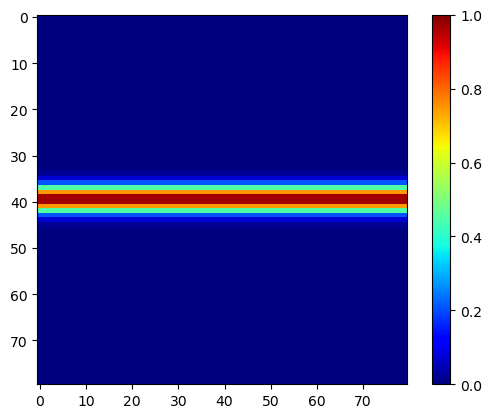

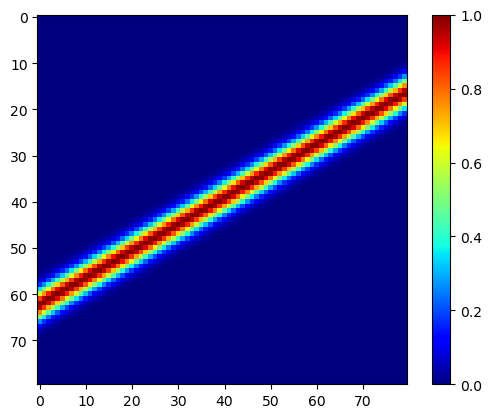

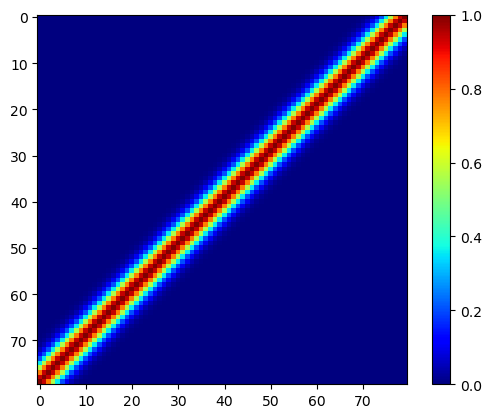

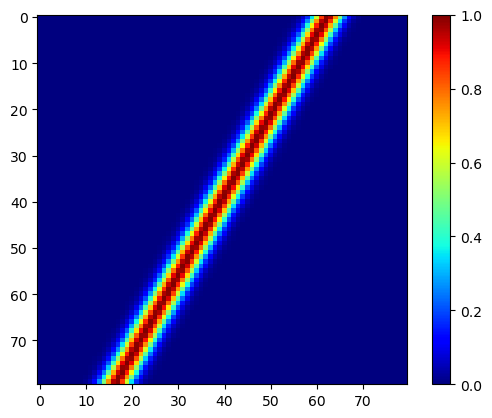

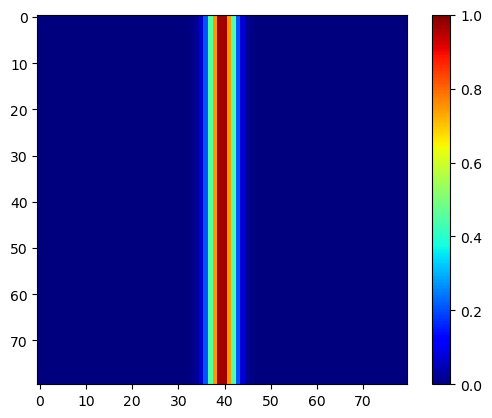

In [28]:
def simulate_edge(x, y, w, theta):
    edge = np.exp(-np.square(x*np.sin(theta) + y *
                  np.cos(theta))/(2*np.square(w)))
    return edge


# Example usage
X, Y = np.meshgrid(np.linspace(-1, 1, 80), np.linspace(-1, 1, 80))

for i in [0,30,45,60,90]:
    Z = simulate_edge(X, Y, w=0.05, theta=np.deg2rad(i))
    plt.imshow(Z, cmap='jet', vmin=0, vmax=1)
    plt.colorbar()
    plt.show()


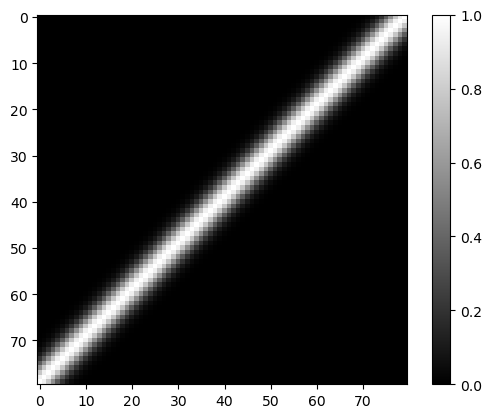

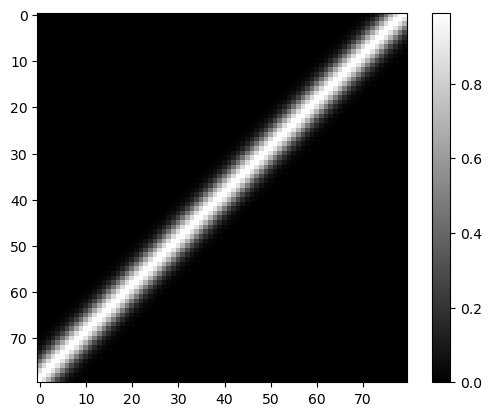

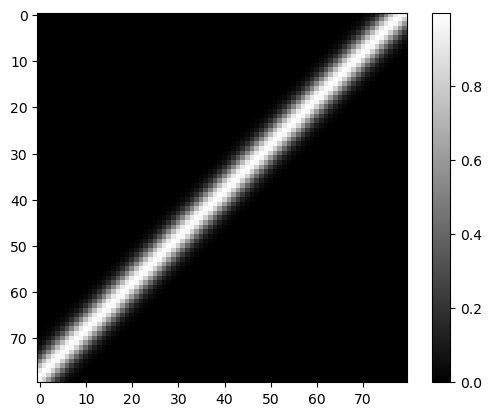

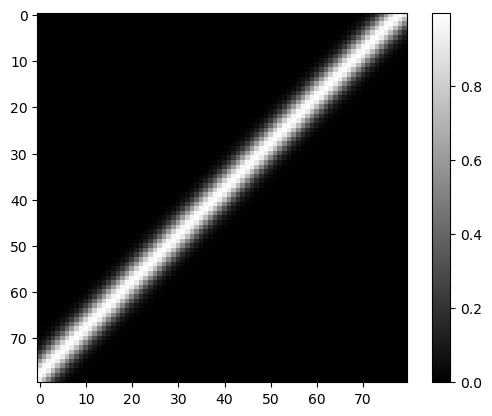

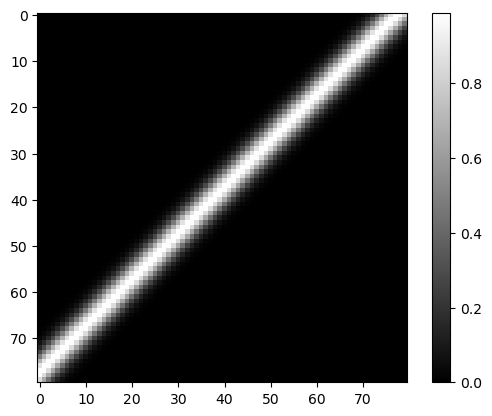

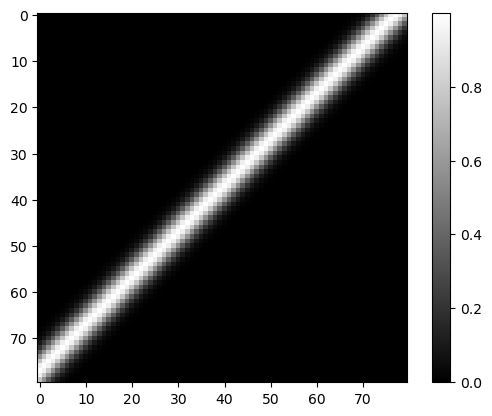

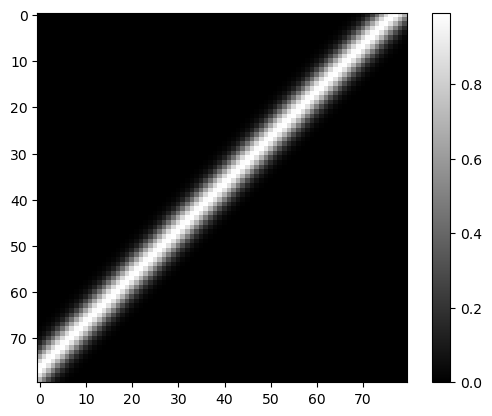

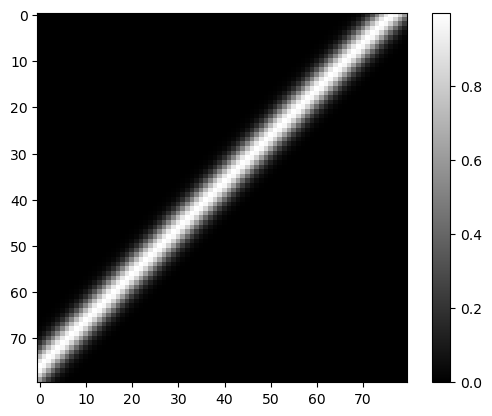

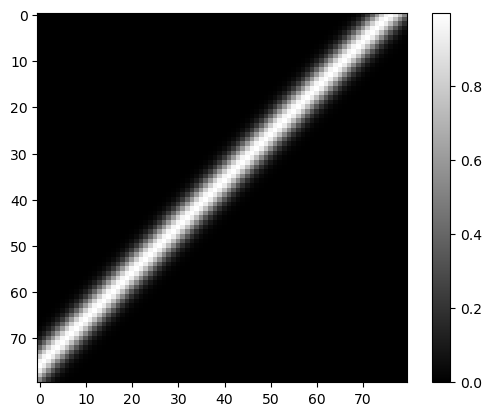

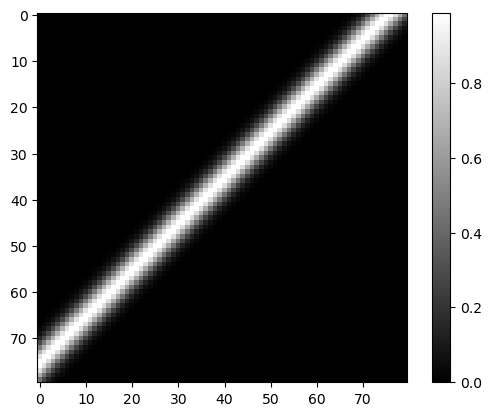

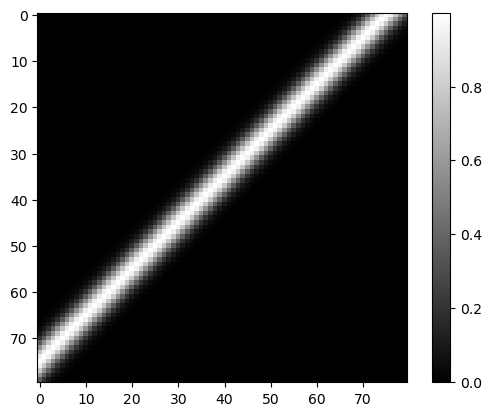

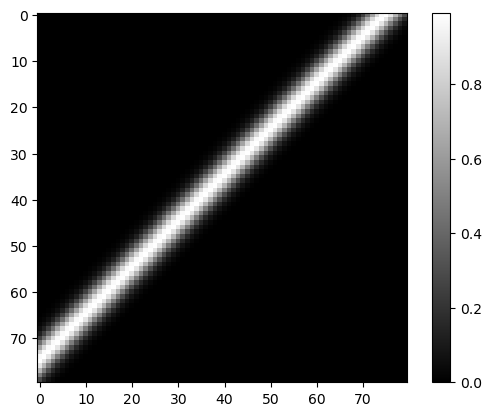

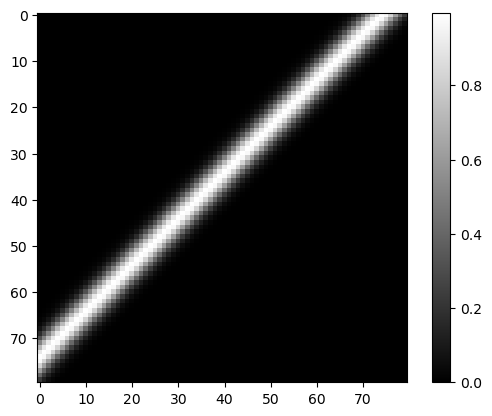

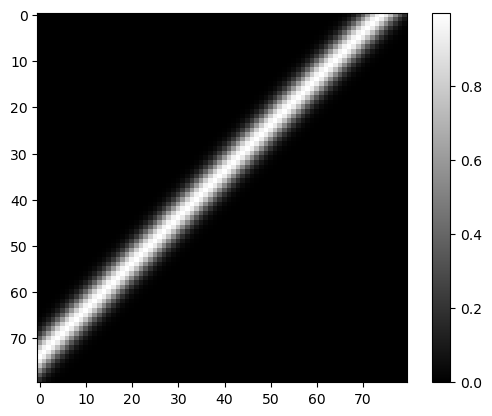

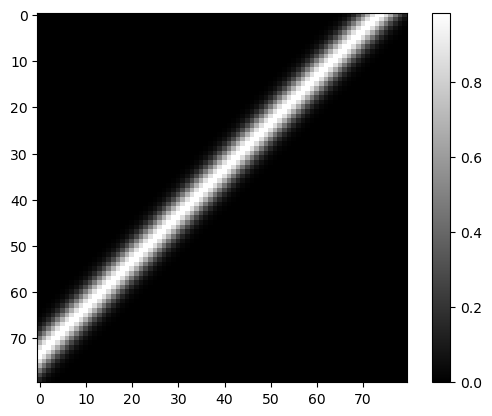

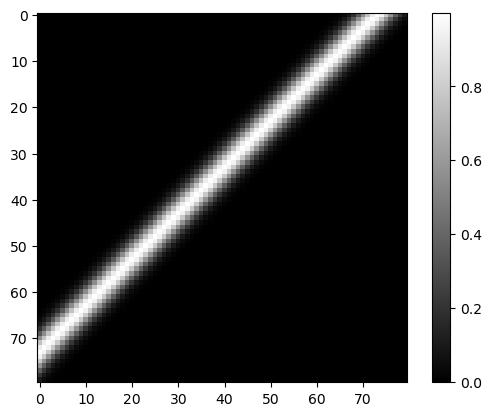

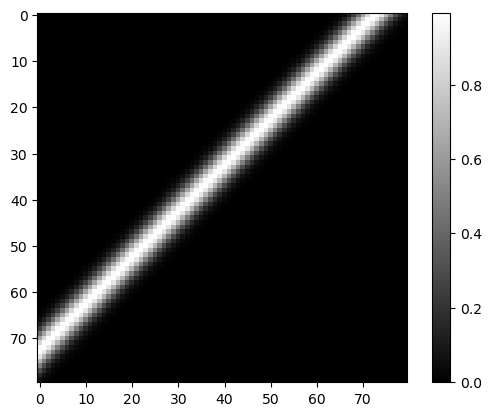

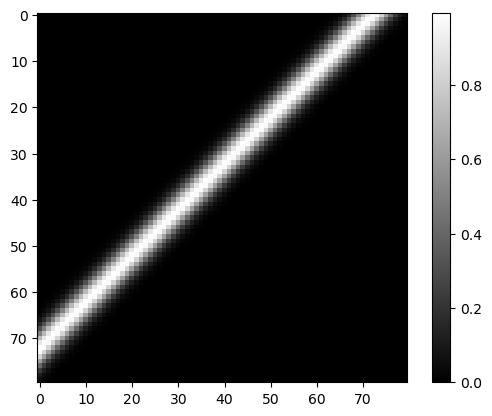

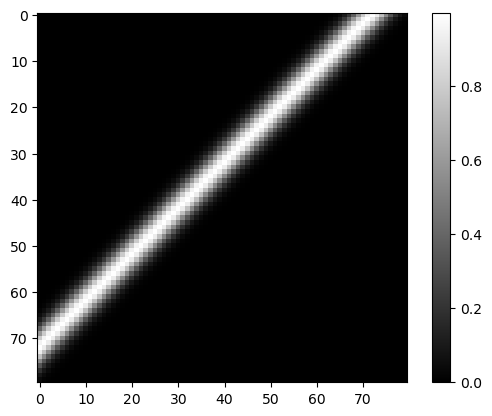

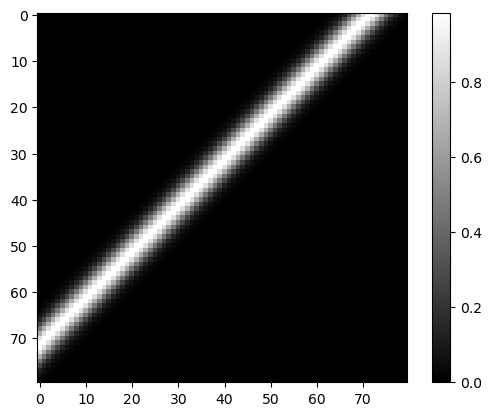

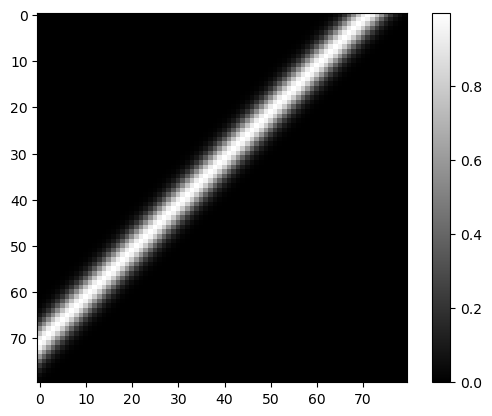

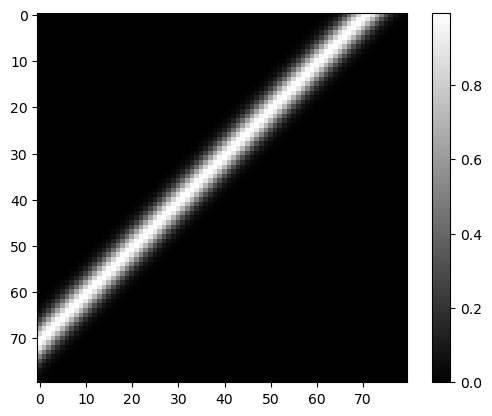

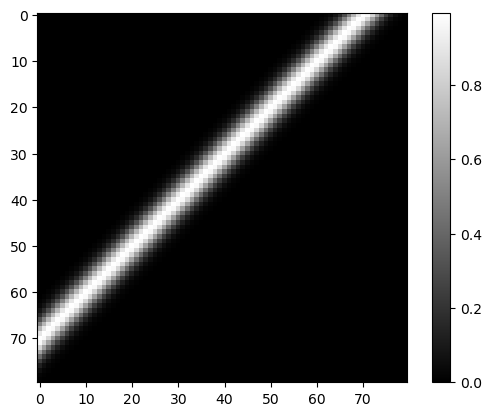

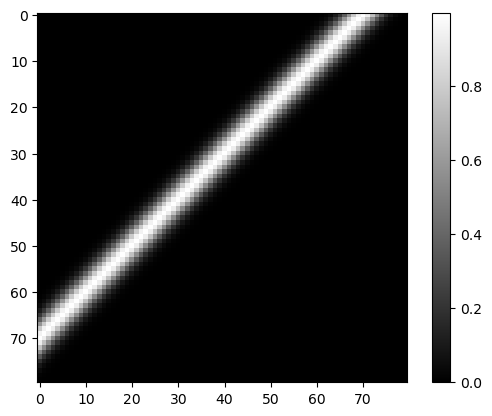

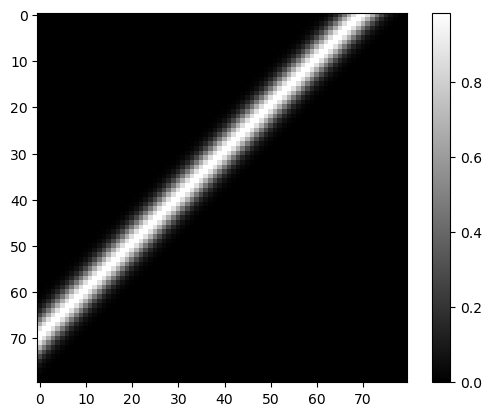

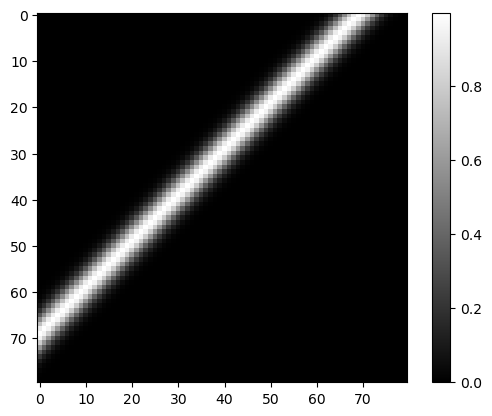

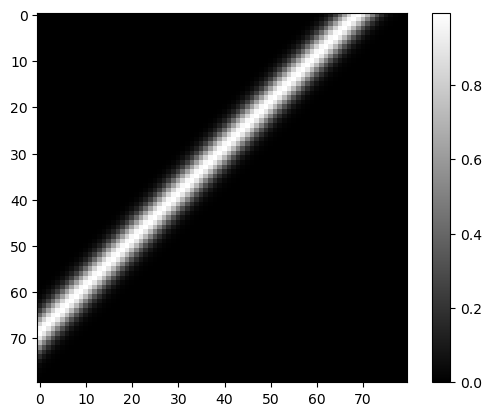

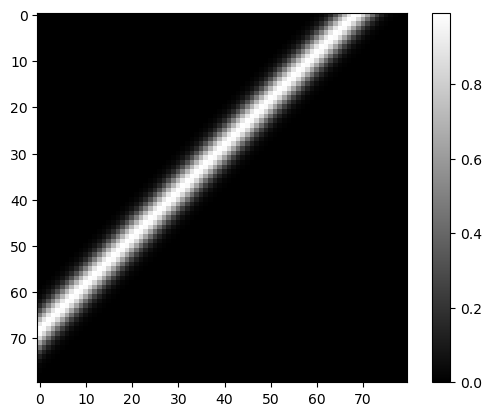

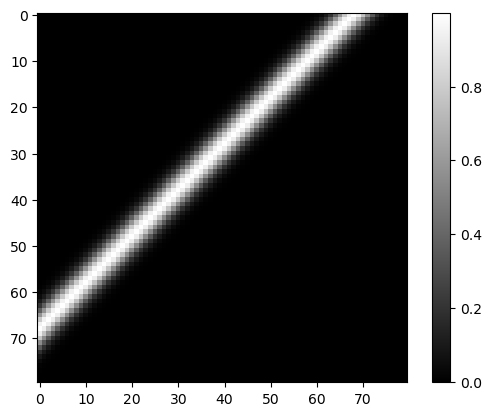

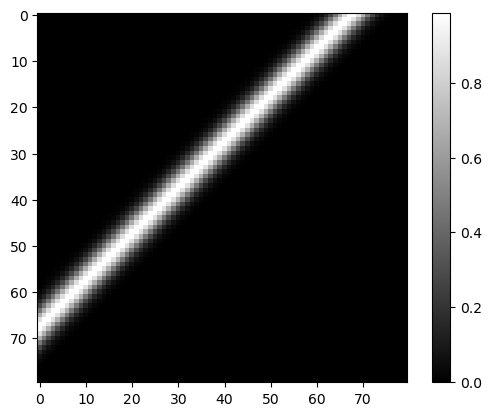

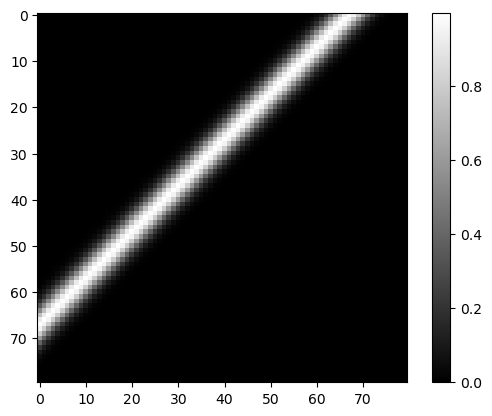

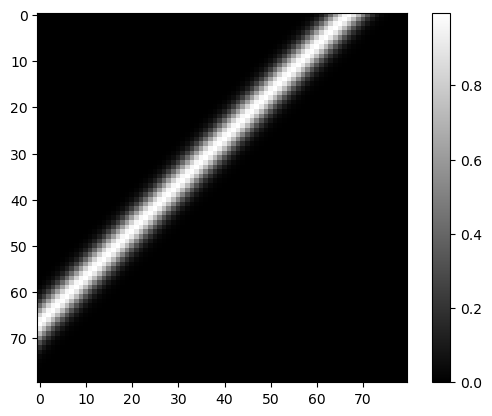

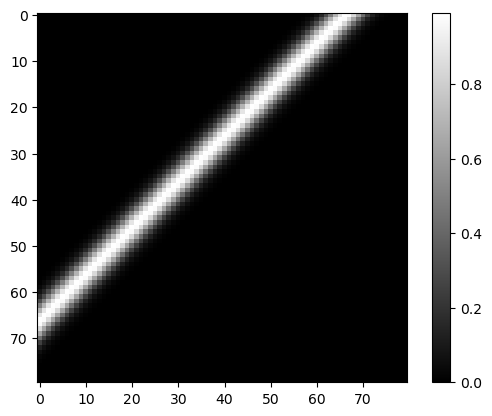

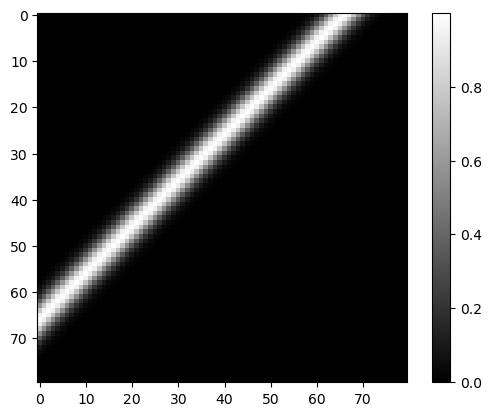

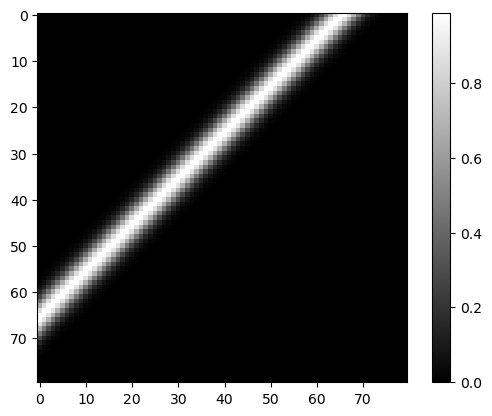

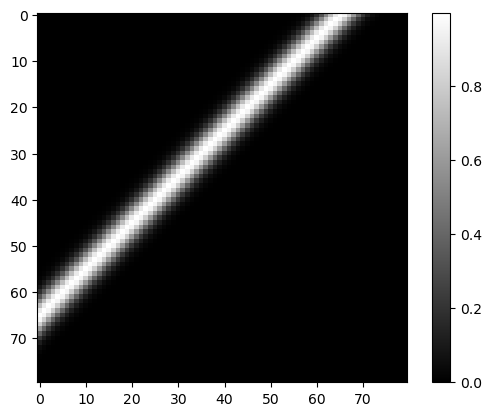

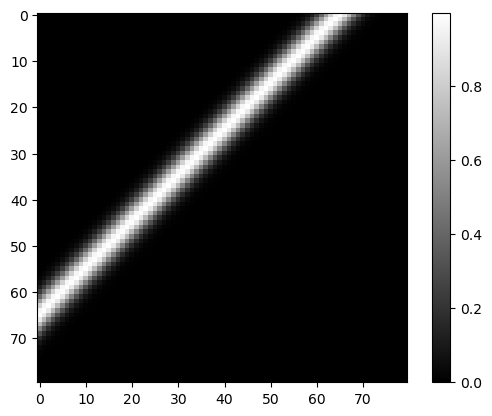

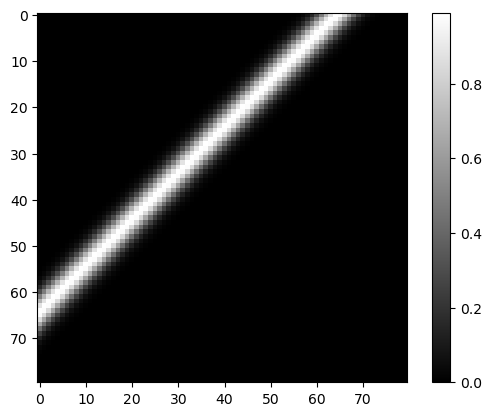

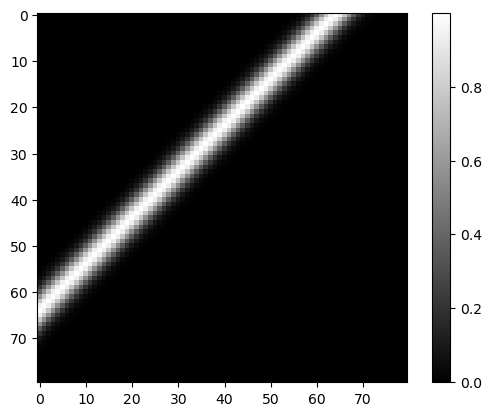

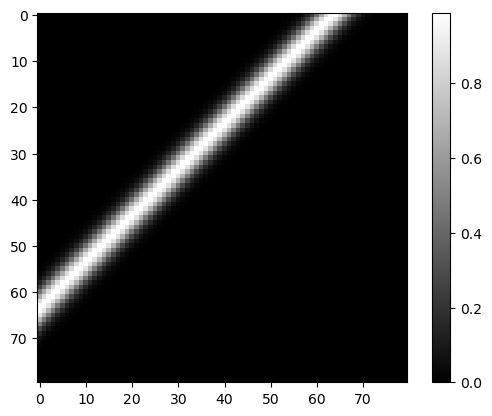

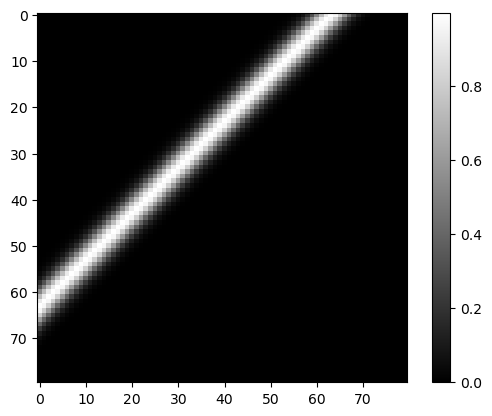

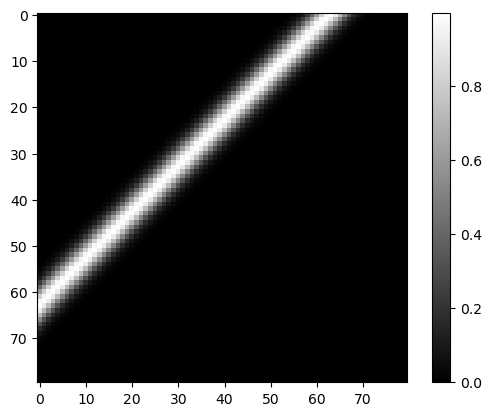

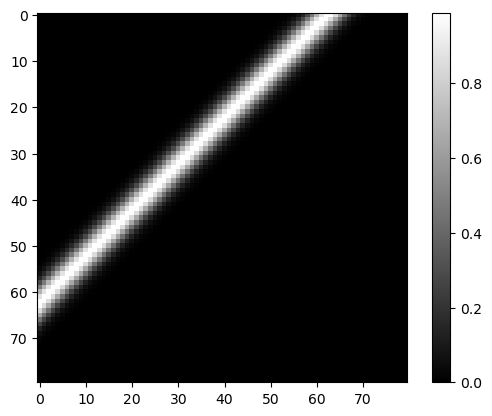

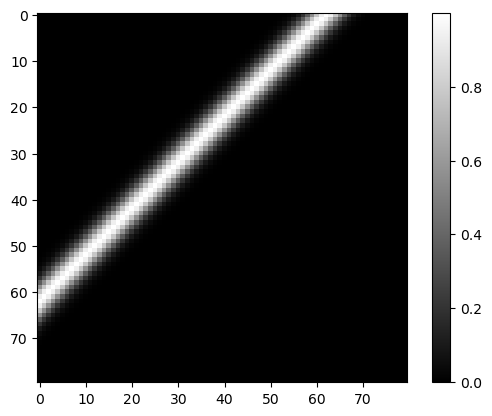

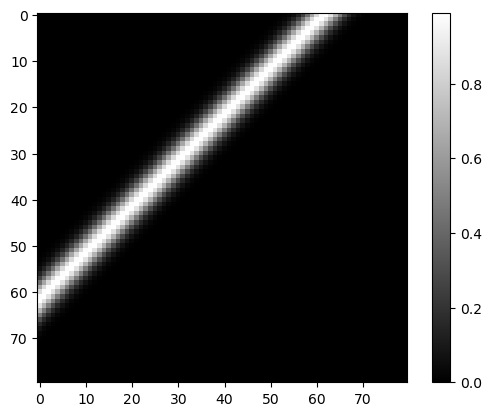

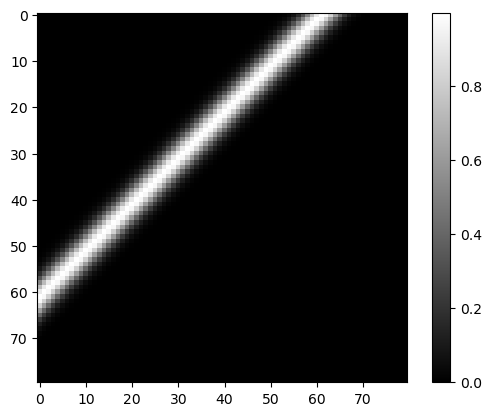

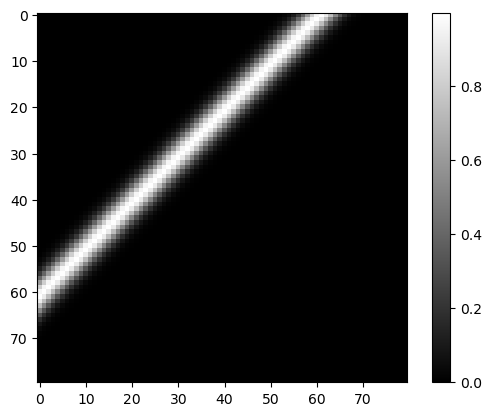

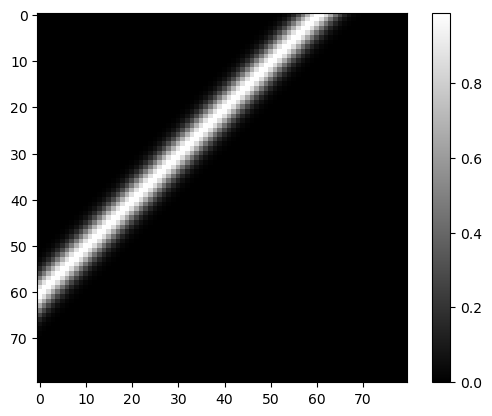

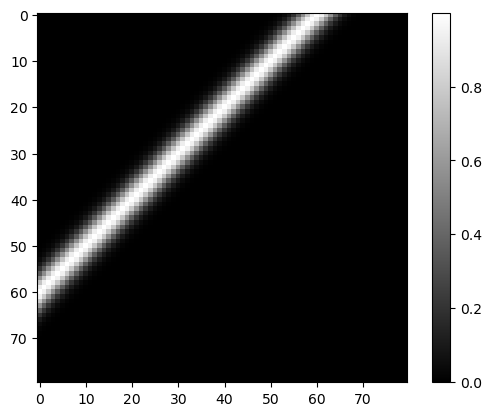

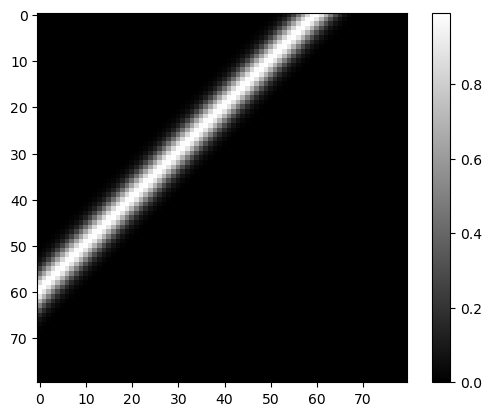

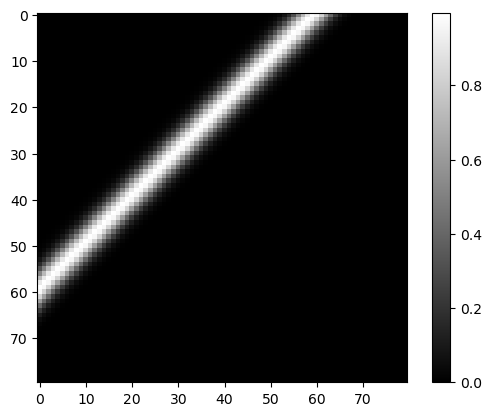

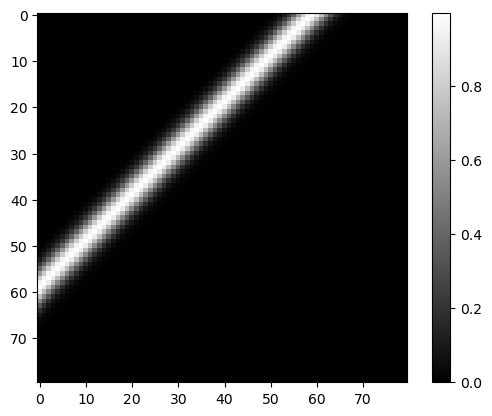

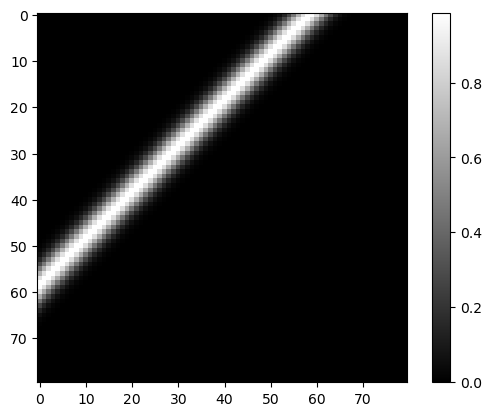

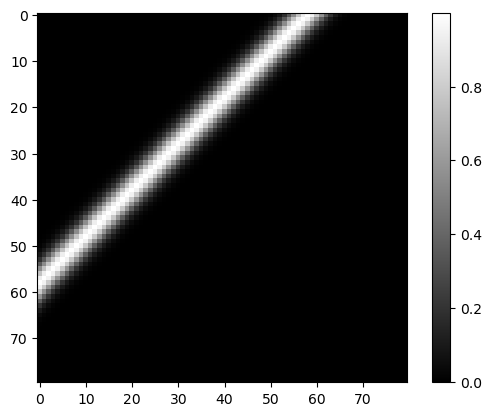

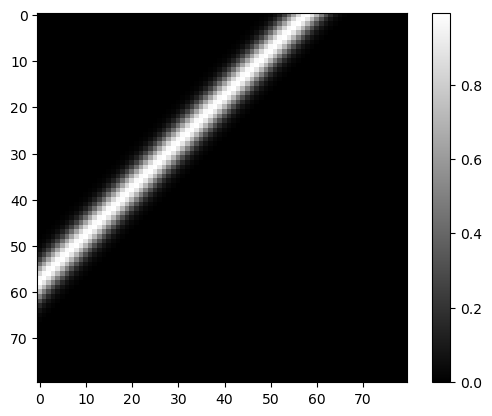

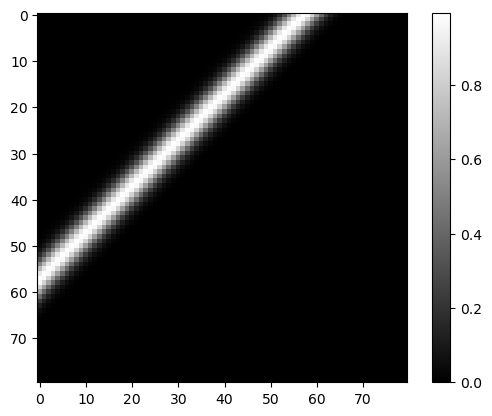

In [29]:
def simulate_edge(x, y, w, theta, t):
    x_shifted = x + t  # shift x by a linear function of time
    edge = np.exp(-np.square(x_shifted*np.sin(theta) +
                  y*np.cos(theta))/(2*np.square(w)))
    return edge


# Example usage
X, Y = np.meshgrid(np.linspace(-1, 1, 80), np.linspace(-1, 1, 80))

for i in range(100):  # simulate edge moving from left to right for 100 time steps
    Z = simulate_edge(X, Y, w=0.05, theta=np.deg2rad(45), t=i/100)
    plt.imshow(Z, cmap='gray')
    plt.colorbar()
    plt.pause(0.1)
